# Module 6: Peer Reviewed Assignment

### Outline:
The objectives for this assignment:

1. Apply the processes of model selection with real datasets.
2. Understand why and how some problems are simpler to solve with some forms of model selection, and others are more difficult.
3. Be able to explain the balance between model power and simplicity.
3. Observe the difference between different model selection criterion.

General tips:

1. Read the questions carefully to understand what is being asked.
2. This work will be reviewed by another human, so make sure that you are clear and concise in what your explanations and answers.

In [14]:
# This cell loads in the necesary packages
library(tidyverse)
library(leaps)
library(ggplot2)

## Problem 1: We Need Concrete Evidence!

[Ralphie](https://en.wikipedia.org/wiki/Ralphie_the_Buffalo) is studying to become a civil engineer. That means she has to know everything about concrete, including what ingredients go in it and how they affect the concrete's properties. She's currently writting up a project about concrete flow, and has asked you to help her figure out which ingredients are the most important. Let's use our new model selection techniques to help Ralphie out!

Data Source: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and 
artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 
2007.

In [15]:
concrete.data = read.csv("Concrete.data")

concrete.data = concrete.data[, c(-1, -9, -11)]
names(concrete.data) = c("cement", "slag", "ash", "water", "sp", "course.agg", "fine.agg", "flow")

head(concrete.data)

,cement,slag,ash,water,sp,course.agg,fine.agg,flow
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,273,82,105,210,9,904,680,62.0
2,163,149,191,180,12,843,746,20.0
3,162,148,191,179,16,840,743,20.0
4,162,148,190,179,19,838,741,21.5
5,154,112,144,220,10,923,658,64.0
6,147,89,115,202,9,860,829,55.0


### 1. (a) Initial Inspections

Sometimes, the best way to start is to just jump in and mess around with the model. So let's do that. Create a linear model with `flow` as the response and all other columns as predictors.

Just by looking at the summary for your model, is there reason to believe that our model could be simpler?

In [16]:
# Your Code Here
lmod <- lm(flow ~., data = concrete.data)
summary(lmod)



Call:
lm(formula = flow ~ ., data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.880 -10.428   1.815   9.601  22.953 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -252.87467  350.06649  -0.722   0.4718  
cement         0.05364    0.11236   0.477   0.6342  
slag          -0.00569    0.15638  -0.036   0.9710  
ash            0.06115    0.11402   0.536   0.5930  
water          0.73180    0.35282   2.074   0.0408 *
sp             0.29833    0.66263   0.450   0.6536  
course.agg     0.07366    0.13510   0.545   0.5869  
fine.agg       0.09402    0.14191   0.663   0.5092  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.84 on 95 degrees of freedom
Multiple R-squared:  0.5022,	Adjusted R-squared:  0.4656 
F-statistic: 13.69 on 7 and 95 DF,  p-value: 3.915e-12


Yes - there are a lot that are significant so we can probably remove some of them

### 1. (b) Backwards Selection
Our model has $7$ predictors. That is not too many, so we can use backwards selection to narrow them down to the most impactful.

Perform backwards selection on your model. You don't have to automate the backwards selection process.

In [17]:
# Your Code Here
lmod_backwards <- lm(flow ~ . - slag, data = concrete.data)
summary(lmod_backwards)

lmod_backwards_again <- lm(flow ~ . - slag - sp, data = concrete.data)
summary(lmod_backwards_again)


Call:
lm(formula = flow ~ . - slag, data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.843 -10.451   1.771   9.589  22.939 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -265.45032   55.46193  -4.786 6.16e-06 ***
cement         0.05766    0.02088   2.761 0.006899 ** 
ash            0.06524    0.01987   3.283 0.001434 ** 
water          0.74420    0.09117   8.163 1.28e-12 ***
sp             0.31366    0.50874   0.617 0.538997    
course.agg     0.07849    0.02447   3.207 0.001820 ** 
fine.agg       0.09909    0.02644   3.747 0.000305 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.78 on 96 degrees of freedom
Multiple R-squared:  0.5022,	Adjusted R-squared:  0.4711 
F-statistic: 16.14 on 6 and 96 DF,  p-value: 9.229e-13



Call:
lm(formula = flow ~ . - slag - sp, data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.893 -10.125   1.773   9.559  23.914 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -249.50866   48.90884  -5.102 1.67e-06 ***
cement         0.05366    0.01979   2.712 0.007909 ** 
ash            0.06101    0.01859   3.281 0.001436 ** 
water          0.72313    0.08426   8.582 1.53e-13 ***
course.agg     0.07291    0.02266   3.217 0.001760 ** 
fine.agg       0.09554    0.02573   3.714 0.000341 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.74 on 97 degrees of freedom
Multiple R-squared:  0.5003,	Adjusted R-squared:  0.4745 
F-statistic: 19.42 on 5 and 97 DF,  p-value: 2.36e-13


### 1. (c) Objection!

Stop right there! Think about what you just did. You just removed the "worst" features from your model. But we know that a model will become less powerful when we remove features so we should check that it's still just as powerful as the original model. Use a test to check whether the model at the end of backward selection is significantly different than the model with all the features.

Describe why we want to balance explanatory power with simplicity.

In [18]:
# Your Code Here
anova(lmod_backwards_again, lmod)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,97,15733.53,NA,NA,NA,NA
2,95,15671.26,2,62.27123,0.1887457,0.8283068


the p value of .82 shows we fail to reject, meaning the removed paramaters are not statistically significant

### 1. (d) Checking our Model

Ralphie is nervous about her project and wants to make sure our model is correct. She's found a function called `regsubsets()` in the leaps package which allows us to see which subsets of arguments produce the best combinations. Ralphie wrote up the code for you and the documentation for the function can be found [here](https://www.rdocumentation.org/packages/leaps/versions/2.1-1/topics/regsubsets). For each of the subsets of features, calculate the AIC, BIC and adjusted $R^2$. Plot the results of each criterion, with the score on the y-axis and the number of features on the x-axis. 

Do all of the criterion agree on how many features make the best model? Explain why the criterion will or will not always agree on the best model.

**Hint**: It may help to look at the attributes stored within the regsubsets summary using `names(rs)`.

Warning message in model.matrix.default(terms(formula, data = data), mm):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(terms(formula, data = data), mm):
“problem with term 8 in model.matrix: no columns are assigned”


,(Intercept),cement,slag,ash,water,sp,course.agg,fine.agg
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE
4,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE
5,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
6,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE


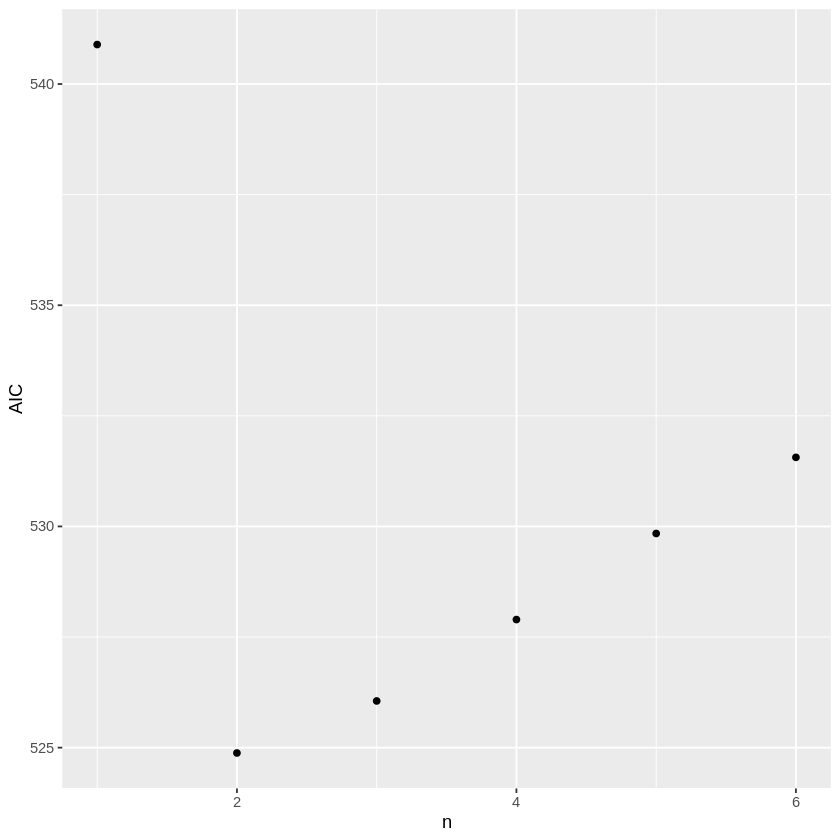

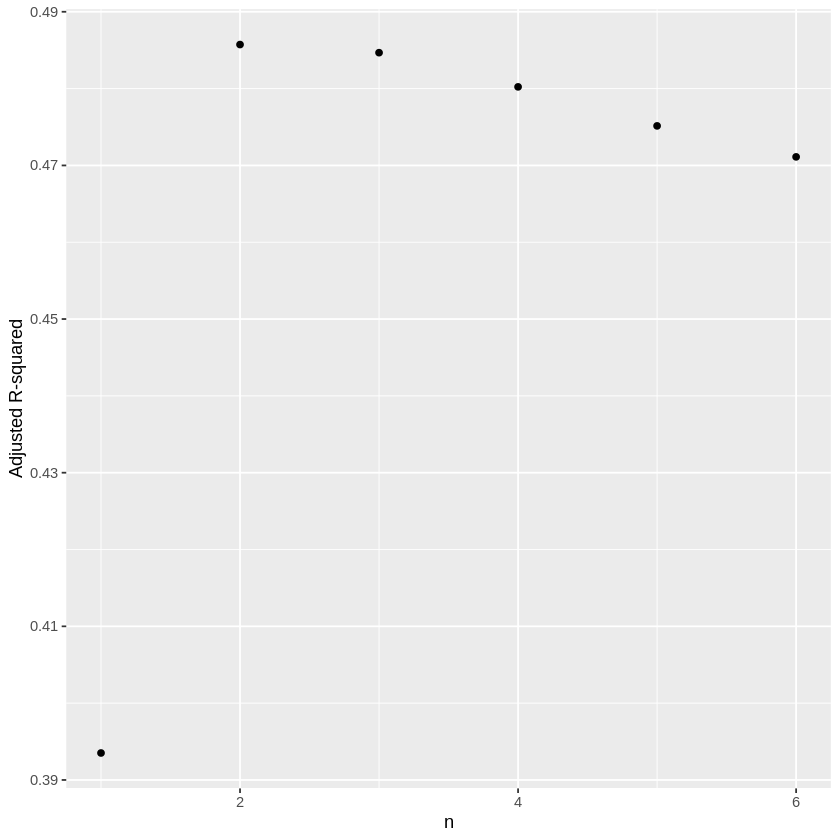

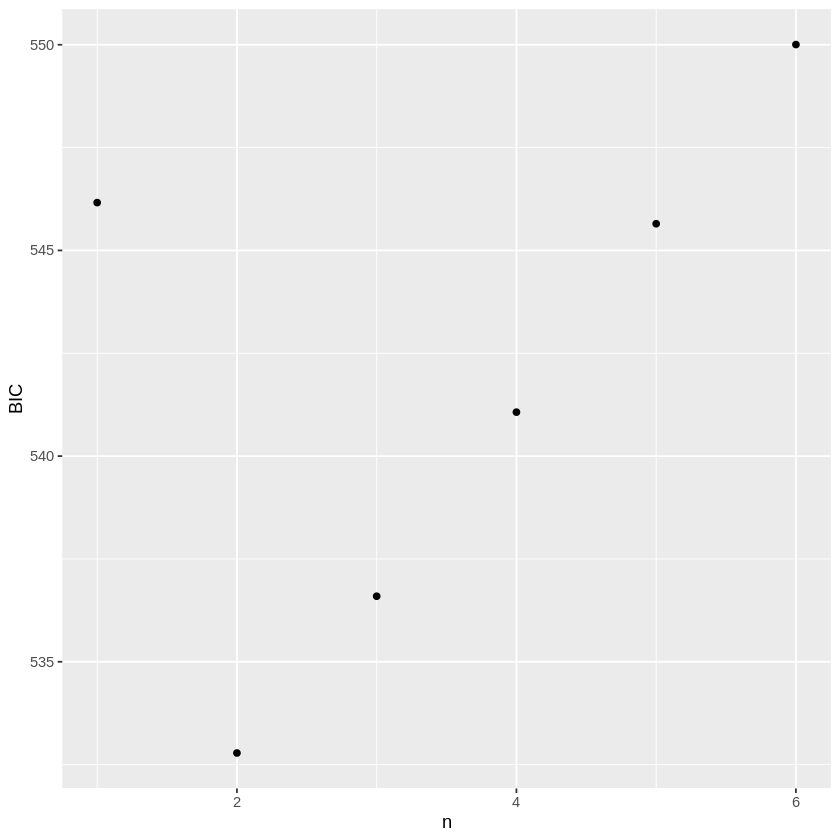

In [19]:
reg = regsubsets(flow ~ cement+slag+ash+water+sp+course.agg+fine.agg+flow, data=concrete.data, nvmax=6)
rs = summary(reg)
rs$which

# Your Code Here

n = dim(concrete.data)[1]
AIC = 2*(2:7) + n*log(rs$rss/n);
BIC = log(n)*(2:7) + n*log(rs$rss/n)

data_AIC <- data.frame(n = 1:6, AIC = AIC)
data_adj_r_squared <- data.frame(n = 1:6, adj_r_squared = rs$adjr2)
data_BIC <- data.frame(n = 1:6, BIC = BIC)


ggplot(data_AIC, aes(x = n, y = AIC)) +
  geom_point() +
  labs(x = "n", y = "AIC")


ggplot(data_adj_r_squared, aes(x = n, y = adj_r_squared)) +
  geom_point() +
  labs(x = "n", y = "Adjusted R-squared")


ggplot(data_BIC, aes(x = n, y = BIC)) +
  geom_point() +
  labs(x = "n", y = "BIC") 

according to all the plots, the best model will have 2 predictors